### Preprocessing

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
np.random.seed(1)

Text(0,0.5,'y')

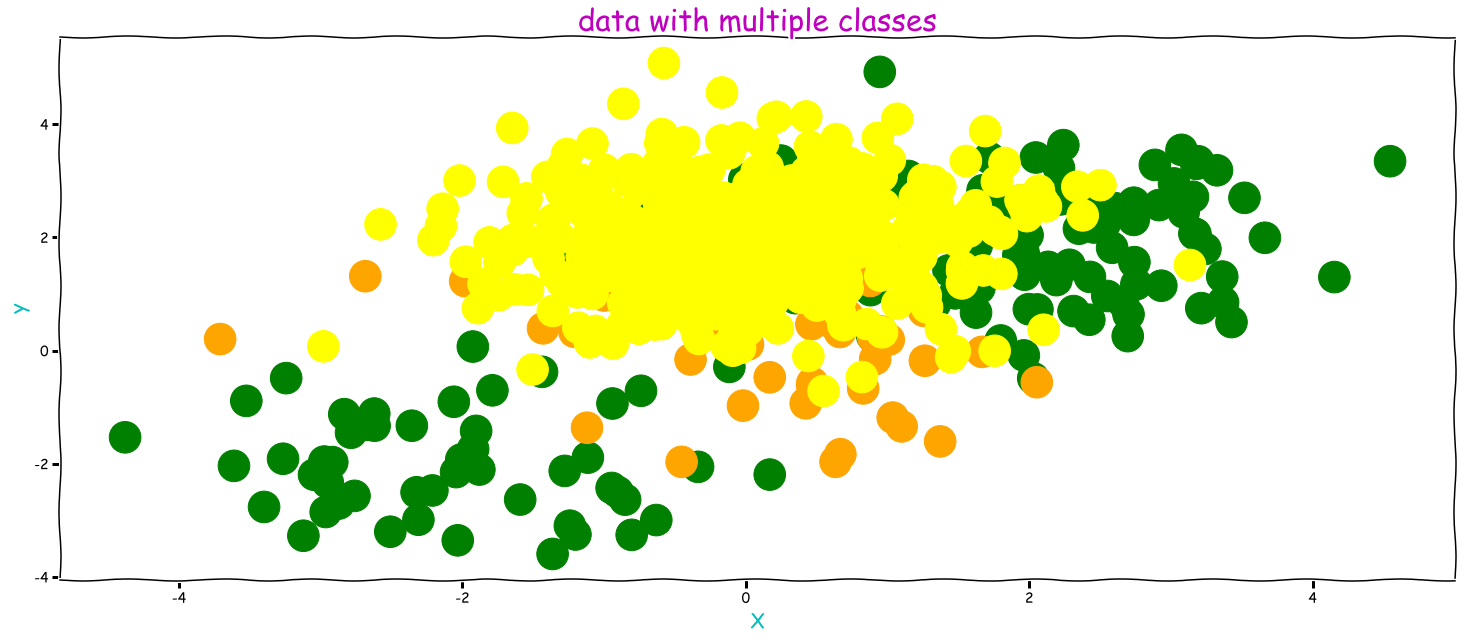

In [25]:
X = np.concatenate([X, np.random.normal(loc=(0, 2), size=(50,2))])
y = np.concatenate([y, 2*np.ones((50,))])

plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(X[:, 0], X[:, 1], s=1000, c=['green' if val==1 else ('orange' if val==0 else 'yellow') for val in y])
plt.title('data with multiple classes', fontsize=30, color='m')
plt.xlabel('X', fontsize=20, color='c')
plt.ylabel('y', fontsize=20, color='c')

In [27]:
from sklearn.svm import SVC
svmfit = SVC(C=1, kernel='rbf', gamma='auto').fit(X, y)

Text(0,0.5,'y')

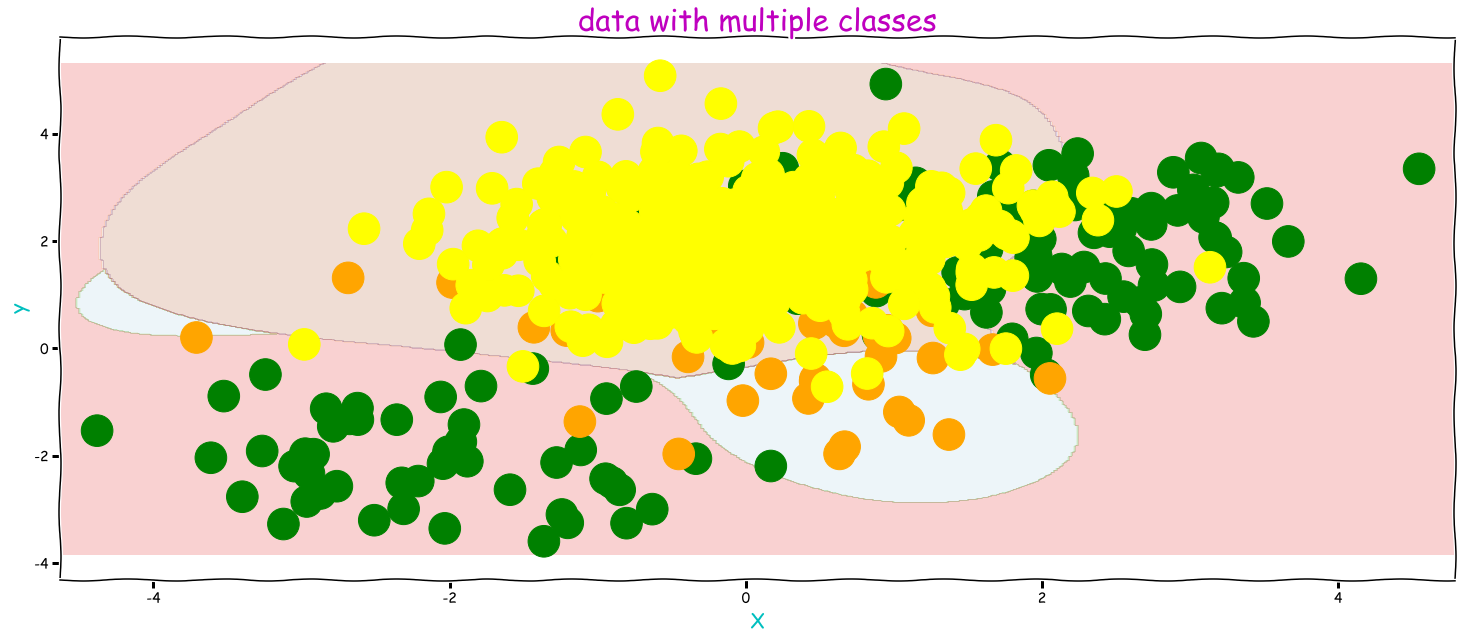

In [28]:
def svmplot(svc, X, y, height=0.02, buffer=0.25):
    x_min, x_max = X[:, 0].min()-buffer, X[:, 0].max()+buffer
    y_min, y_max = X[:, 1].min()-buffer, X[:, 1].max()+buffer
    xx, yy = np.meshgrid(np.arange(x_min, x_max, height), np.arange(y_min, y_max, height))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

plt.xkcd()
plt.figure(figsize=(25, 10))
svmplot(svmfit, X, y)
plt.scatter(X[:, 0], X[:, 1], s=1000, c=['green' if val==1 else ('orange' if val==0 else 'yellow') for val in y])
plt.title('data with multiple classes', fontsize=30, color='m')
plt.xlabel('X', fontsize=20, color='c')
plt.ylabel('y', fontsize=20, color='c')

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
conf_mat = pd.DataFrame(confusion_matrix(y, svmfit.predict(X)).T, index = svmfit.classes_, columns = svmfit.classes_)
conf_mat

,0.0,1.0,2.0
0.0,13,1,2
1.0,4,103,10
2.0,33,46,438


In [31]:
class_mat = classification_report(y, svmfit.predict(X))
print(class_mat)

              precision    recall  f1-score   support

         0.0       0.81      0.26      0.39        50
         1.0       0.88      0.69      0.77       150
         2.0       0.85      0.97      0.91       450

   micro avg       0.85      0.85      0.85       650
   macro avg       0.85      0.64      0.69       650
weighted avg       0.85      0.85      0.84       650

